## Multi Class Classification Model development

### Objective: 
Build a ML and DL data science models to classify the review rating from 1 - 10. 
##### Dataset Link : https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset/metadata?resource=download&select=rotten_tomatoes_movies.csv



#### About Dataset
###### Context
Movies' data is stored on several popular websites, but when it comes to critic reviews there is no better place than Rotten Tomatoes. This website allows to compare the ratings given by regular users (audience score) and the ratings given/reviews provided by critics (tomatometer) who are certified members of various writing guilds or film critic-associations.

###### Content
In the movies dataset each record represents a movie available on Rotten Tomatoes, with the URL used for the scraping, movie tile, description, genres, duration, director, actors, users' ratings, and critics' ratings. In the critics dataset each record represents a critic review published on Rotten Tomatoes, with the URL used for the scraping, critic name, review publication, date, score, and content.

###### Acknowledgements
Data has been scraped from the publicly available website https://www.rottentomatoes.com as of 2020-10-31.
Since the data takes a few days to be scraped from the website, there is no full consistency between some fields of the movies and critics datasets such as "tomatometercount", "tomatometertopcriticscount", "tomatometerfreshcriticscount", and "tomatometerrottencriticscount" of the movies dataset compared to all records included in the critics dataset, which has been scraped first.

###### For additional information about the data set please visit : https://www.rottentomatoes.com/about

#### Approch:
Following is the approach followed to complete the this task. 
1. Data Exploration and Data Cleaning,
2. Data Analysis,
3. ML Model Building,
4. ML Model Comparison,
5. DL Model Building, 
6. Insights.

In [1]:
#Importing necessary Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
#Reading data files
df_md = pd.read_csv("rotten_tomatoes_movies.csv")
df_mc = pd.read_csv("rotten_tomatoes_critic_reviews.csv")

In [3]:
df_md.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [4]:
df_mc.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


#### Data Preprocessing and Cleaning:

In [5]:
df_md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [6]:
df_md.isnull().sum()

rotten_tomatoes_link                   0
movie_title                            0
movie_info                           321
critics_consensus                   8578
content_rating                         0
genres                                19
directors                            194
authors                             1542
actors                               352
original_release_date               1166
streaming_release_date               384
runtime                              314
production_company                   499
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
audience_status                      448
audience_rating                      296
audience_count                       297
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
dtype: int64

In [7]:
df_md.shape

(17712, 22)

In [8]:
#Removing the duplicate records from the dataframe
df_md.drop_duplicates(inplace=True)

In [9]:
df_md.shape

(17712, 22)

##### From the list of 22 variables, critics_consensus contains the most null values and is close to 50% of the data, and the variables authors, release date will not have any impact on the tomatometer_rating which is the target column which we are going to predict. So its better to drop these from the data set. 


In [10]:
df_md.drop(columns=['critics_consensus', 'authors', 'original_release_date','streaming_release_date'], inplace = True)

In [11]:
#Cleaning the data by dropping all the NAN values
df_md = df_md.dropna(how='any')

In [12]:
#Making a copy of the original dataframe for further analysis.
df_new = df_md.copy()

Since the reuquirement was to create 10 classes from the ratings variable, the tomatometer_ratings is devided into 10 classes
by deviding it by 10 and making the values 1-10. 

In [13]:
df_new.tomatometer_rating = (df_new.tomatometer_rating/10.0).astype('int')
df_new = df_new[df_new.tomatometer_rating > 0]

In [14]:
df_new.shape

(15461, 18)

In [15]:
df_new.tomatometer_rating = ['class_'+str(df_new.tomatometer_rating.values[i]) for i in range(df_new.shape[0])]

In [16]:
#Checking the Data distribution for each classes:
df_new.tomatometer_rating.value_counts()

class_8     2658
class_9     2057
class_7     1832
class_6     1753
class_5     1548
class_4     1301
class_2     1253
class_3     1211
class_1     1111
class_10     737
Name: tomatometer_rating, dtype: int64

In [17]:
df_new.tomatometer_rating.describe()

count       15461
unique         10
top       class_8
freq         2658
Name: tomatometer_rating, dtype: object

In [18]:
df_new.shape

(15461, 18)

In [19]:
df_new.isnull().sum()

rotten_tomatoes_link                0
movie_title                         0
movie_info                          0
content_rating                      0
genres                              0
directors                           0
actors                              0
runtime                             0
production_company                  0
tomatometer_status                  0
tomatometer_rating                  0
tomatometer_count                   0
audience_status                     0
audience_rating                     0
audience_count                      0
tomatometer_top_critics_count       0
tomatometer_fresh_critics_count     0
tomatometer_rotten_critics_count    0
dtype: int64

In [20]:
df_new.nunique()

rotten_tomatoes_link                15461
movie_title                         14980
movie_info                          15459
content_rating                          6
genres                               1047
directors                            7754
actors                              15454
runtime                               181
production_company                   2743
tomatometer_status                      3
tomatometer_rating                     10
tomatometer_count                     389
audience_status                         2
audience_rating                        97
audience_count                      10429
tomatometer_top_critics_count          69
tomatometer_fresh_critics_count       345
tomatometer_rotten_critics_count      197
dtype: int64

In [21]:
df_new.content_rating.value_counts()

R        5767
NR       4393
PG-13    2654
PG       1974
G         638
NC17       35
Name: content_rating, dtype: int64

In [22]:
df_new.genres.value_counts()

Drama                                                                             1687
Comedy                                                                            1029
Comedy, Drama                                                                      805
Drama, Mystery & Suspense                                                          648
Art House & International, Drama                                                   528
                                                                                  ... 
Animation, Anime & Manga, Art House & International, Science Fiction & Fantasy       1
Animation, Anime & Manga, Drama, Mystery & Suspense, Science Fiction & Fantasy       1
Classics, Comedy, Drama, Mystery & Suspense, Special Interest, Romance               1
Horror, Romance                                                                      1
Action & Adventure, Drama, Horror, Kids & Family, Mystery & Suspense                 1
Name: genres, Length: 1047, dtype: int64

###### Removing Special characters from genres variable

In [23]:
import re
df_new.genres = [re.sub('[^a-zA-Z]', ' ', df_new.genres.values[i]) for i in range(df_new.shape[0])]


In [24]:
df_new.production_company.nunique()

2743

C:\Users\prabh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tomatometer_rating'>

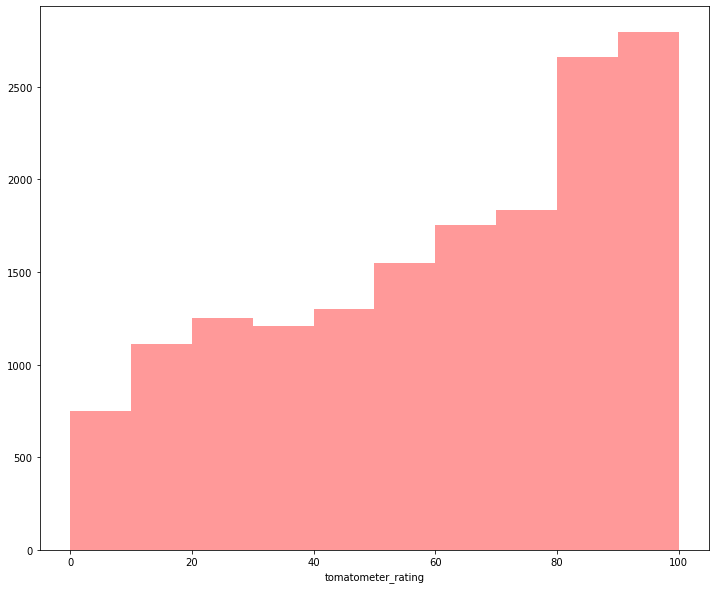

In [25]:
#Checking the distribution of the target variable tomatometer_ratings
plt.figure(figsize=(12,10))
sb.set_palette('Accent')
sb.distplot(df_md.tomatometer_rating, kde=False, bins=10, color='RED')

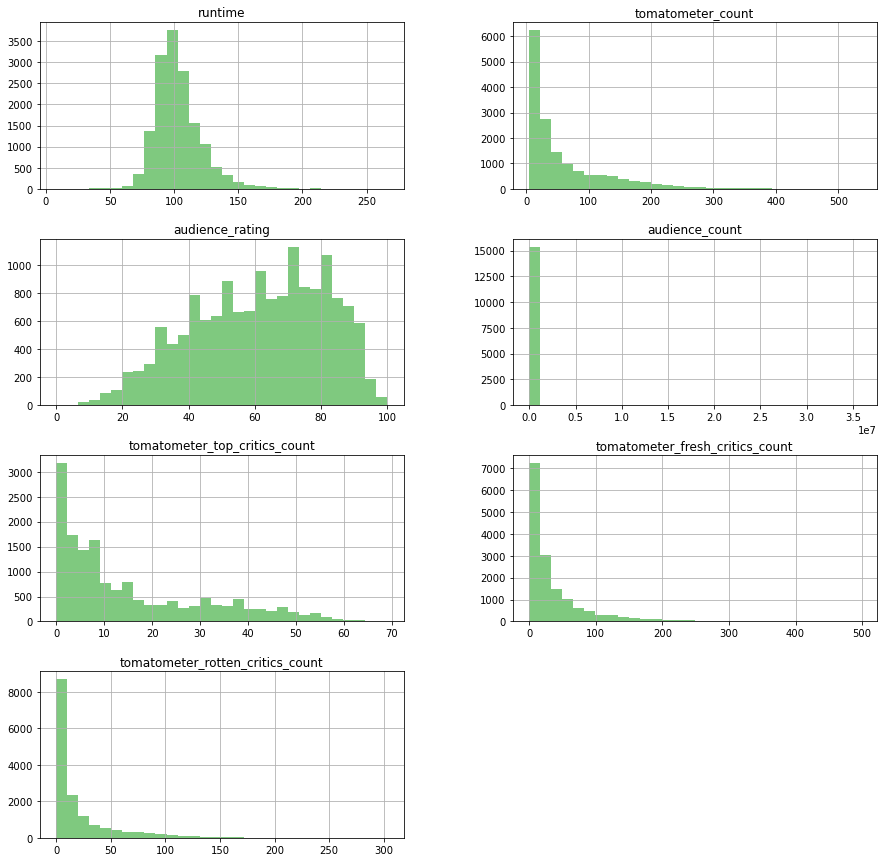

In [26]:
df_new.hist(bins=30, figsize=(15,15), layout=(4,2));

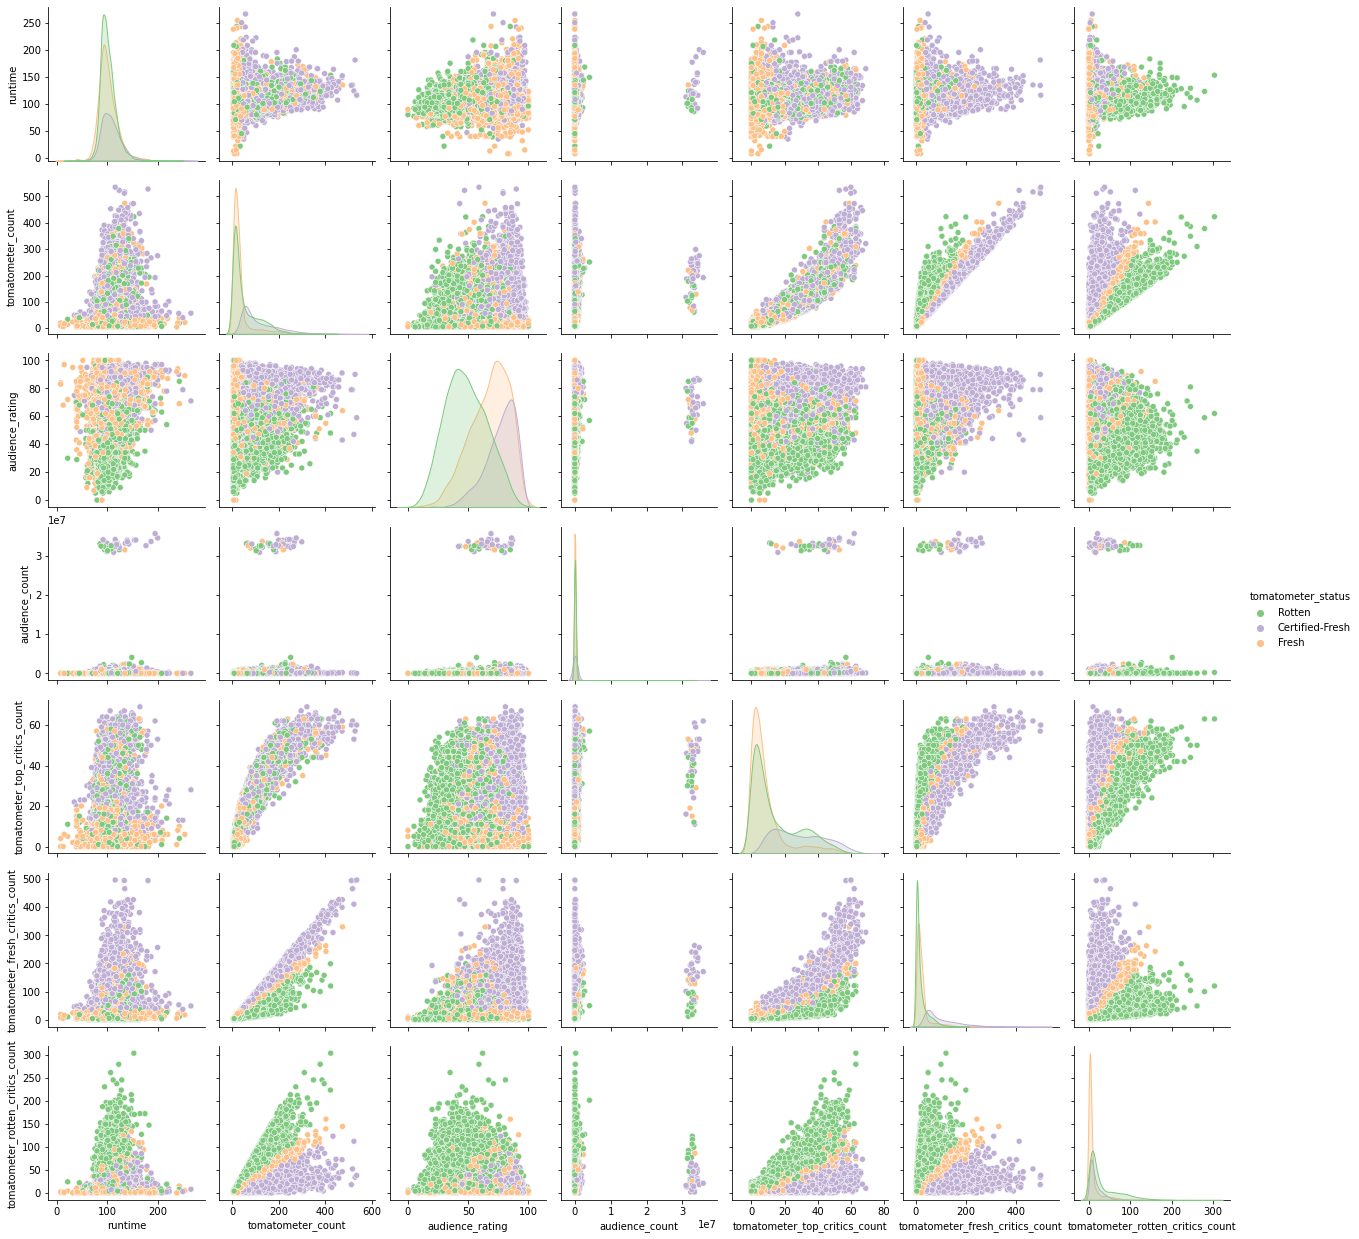

In [27]:
sb.pairplot(df_new, hue='tomatometer_status', )


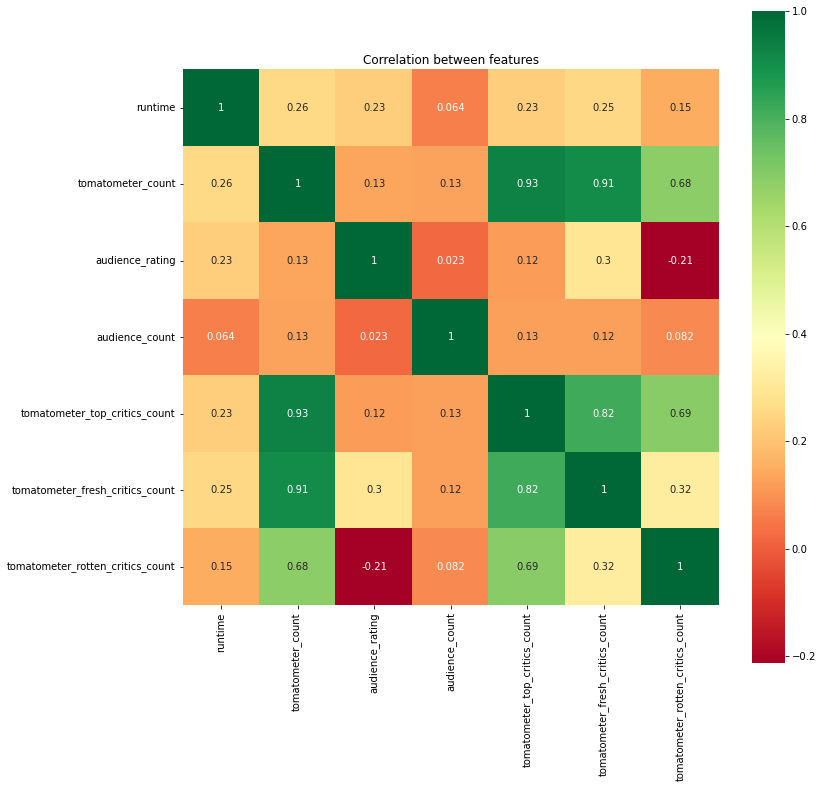

In [28]:
#heatmap to see the correlation among the features
plt.figure(figsize=(12,12))
sb.heatmap(df_new.corr(), vmax=1, square=True, annot=True,cmap='RdYlGn')
plt.title('Correlation between features')
plt.show()

In [29]:
#Seperating Text, categorical and numerical columns

In [30]:
df_new.tomatometer_rating.shape

(15461,)

In [31]:
text_cols = ['movie_title','movie_info','generes','directors', 'actors', 'production_company']
cat_cols = ['content_rating','tomatometer_status','audience_status']
num_cols = ['runtime','tomatometer_count','audience_rating','audience_count',
            'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count','tomatometer_rotten_critics_count']            

In [32]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score

In [33]:
##### Encoding the categorical columns with one hot encoding

In [34]:
df_cat = df_new[cat_cols]

df_cat = pd.get_dummies(df_cat, drop_first=True)

In [35]:
df_cat.shape

(15461, 8)

In [36]:
df_cat.head()

,content_rating_NC17,content_rating_NR,content_rating_PG,content_rating_PG-13,content_rating_R,tomatometer_status_Fresh,tomatometer_status_Rotten,audience_status_Upright
0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,1
2,0,0,0,0,1,1,0,0
3,0,1,0,0,0,0,0,1
4,0,0,0,0,0,1,0,1


In [37]:
#Since the numerical columns are having higher range of values, normally the model will give higher weightage
#to larger values and the prediction will biased towards the columns with higher values. 
#To avoid this, we will normalise the column values with the minmax scaler functionality of sklearn. 

In [38]:
df_num = df_new[num_cols]
df_final = pd.concat([df_cat, df_num], axis=1)#, ignore_index=True)

###  Insights from Data Exploration:
1. The target variable is right skewed and the the review ratings are highly distributed towards higher ratings.
2. The distribuation of the review counts on the rating category shows that for any movie the number of critics counts are less in number. 
3. Rating count is highly correlated with top critics counts and is evident from the heat map.
4. Movies with better ratings are having positive correlation with the review and audience counts as it is clearly visible from    the pair plot analysis. 

#### Model Building:
Building four famous classification models and review their performance. 
They are Logistic Regression, MultinomialNB, RandomForest Classifier and XGBoost Classifier.

In [39]:
# Seprating independant and dependant variables to input the model.
X = df_final
y = df_new['tomatometer_rating']


In [40]:
from sklearn.model_selection import train_test_split

In [41]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler

model_lr = make_pipeline(StandardScaler(), OneVsRestClassifier(LogisticRegression(max_iter=1000)))
model_lr

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('onevsrestclassifier',
                 OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000)))])

In [43]:
model_lr.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('onevsrestclassifier',
                 OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000)))])

In [44]:
lr_pred = model_lr.predict(X_test)


In [45]:
lr_pred[:10]

array(['class_1', 'class_4', 'class_8', 'class_5', 'class_5', 'class_6',
       'class_8', 'class_8', 'class_2', 'class_9'], dtype='<U8')

In [46]:
y_test.iloc[:10]

168      class_1
9034     class_5
8034     class_8
10687    class_5
418      class_5
3511     class_6
9723     class_9
15505    class_8
6846     class_3
14613    class_9
Name: tomatometer_rating, dtype: object

In [47]:
print("Logistic Regression Accuracy Score :", round(accuracy_score(y_test, lr_pred)*100))

Logistic Regression Accuracy Score : 63


In [48]:
print('LR classification_report:')
print(classification_report(y_test,lr_pred))

LR classification_report:
              precision    recall  f1-score   support

     class_1       0.66      0.94      0.77       322
    class_10       0.61      0.55      0.58       211
     class_2       0.54      0.42      0.47       365
     class_3       0.71      0.30      0.42       378
     class_4       0.66      0.23      0.34       405
     class_5       0.51      0.97      0.67       457
     class_6       0.65      0.92      0.76       532
     class_7       0.77      0.17      0.28       567
     class_8       0.60      0.81      0.69       805
     class_9       0.84      0.77      0.80       597

    accuracy                           0.63      4639
   macro avg       0.65      0.61      0.58      4639
weighted avg       0.66      0.63      0.59      4639



In [49]:
cm_lr = confusion_matrix(y_test, lr_pred)

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

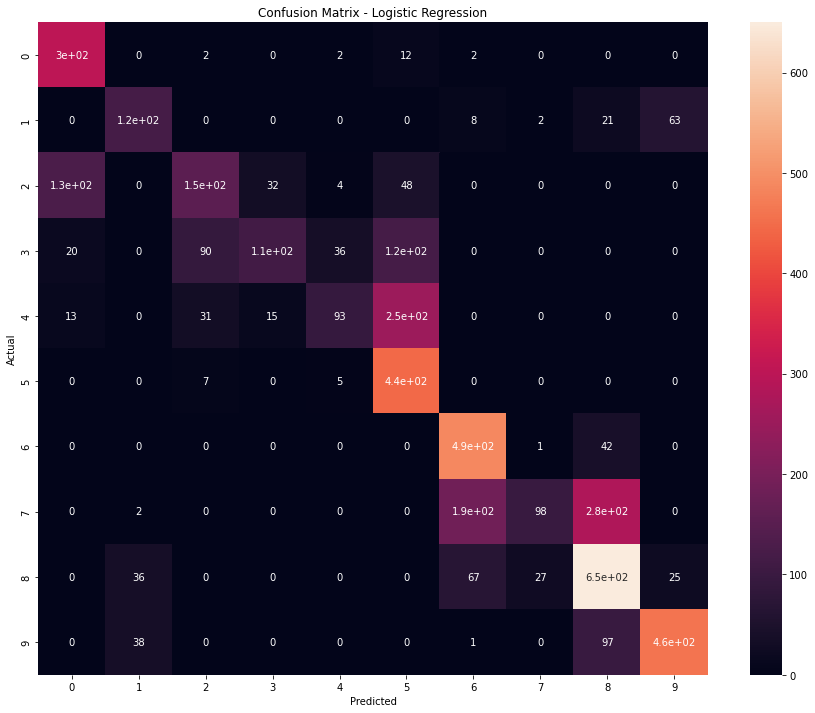

In [50]:
plt.figure(figsize=(15,12))
sb.heatmap(cm_lr, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")

In [51]:
#### RandomForest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
model_rf = OneVsRestClassifier(RandomForestClassifier(n_estimators=10))
model_rf.fit(X_train, y_train)

rfc_pred = model_rf.predict(X_test)
accuracy_score(y_test, rfc_pred)

0.8424229359775813

In [53]:
print("Random Forest Accuracy Score :", round(accuracy_score(y_test, rfc_pred)*100))

Random Forest Accuracy Score : 84


Text(0.5, 1.0, 'Confusion Matrix - RandomForest Classifier')

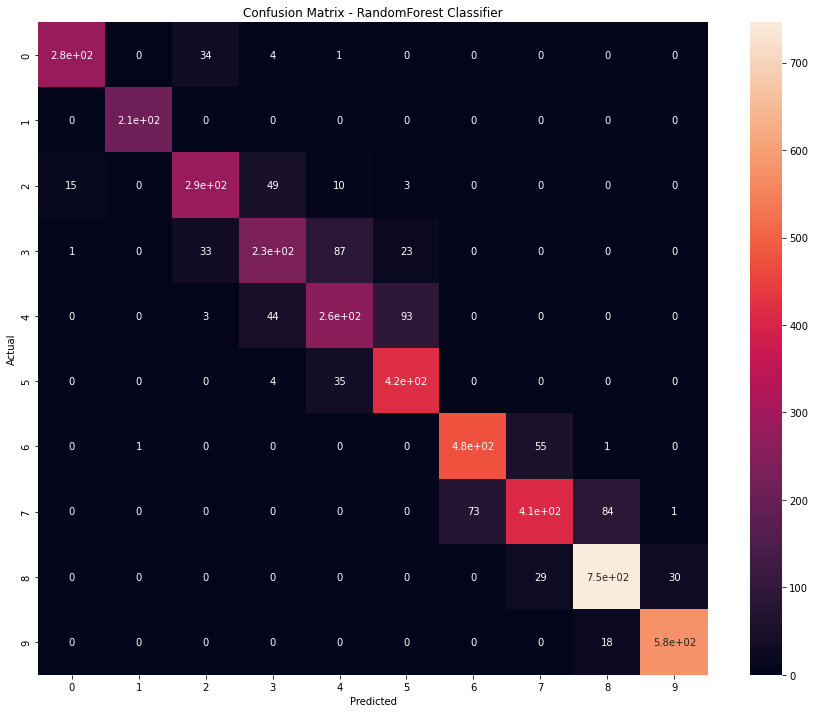

In [54]:
cm_rfc = confusion_matrix(y_test, rfc_pred)
plt.figure(figsize=(15,12))
sb.heatmap(cm_rfc, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - RandomForest Classifier")

In [55]:
##### MultinomialNB

In [57]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

model_nb = make_pipeline(MinMaxScaler(), OneVsRestClassifier(MultinomialNB()))

model_nb.fit(X_train, y_train)

nb_pred = model_nb.predict(X_test)
print("NB Accuracy Score :", round(accuracy_score(y_test, nb_pred)*100))

NB Accuracy Score : 33


In [58]:
#### XGBoost Classifier

In [59]:
from xgboost import XGBClassifier

model_xg = make_pipeline(MinMaxScaler(), OneVsRestClassifier(XGBClassifier())).fit(X_train, y_train)

xgb_pred = model_xg.predict(X_test)

C:\Users\prabh\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:10:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:10:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:10:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:10:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [60]:
print("XGBoost Accuracy Score :", round(accuracy_score(y_test, xgb_pred)*100))

XGBoost Accuracy Score : 97


Text(0.5, 1.0, 'Confusion Matrix - XGBoost Classifier')

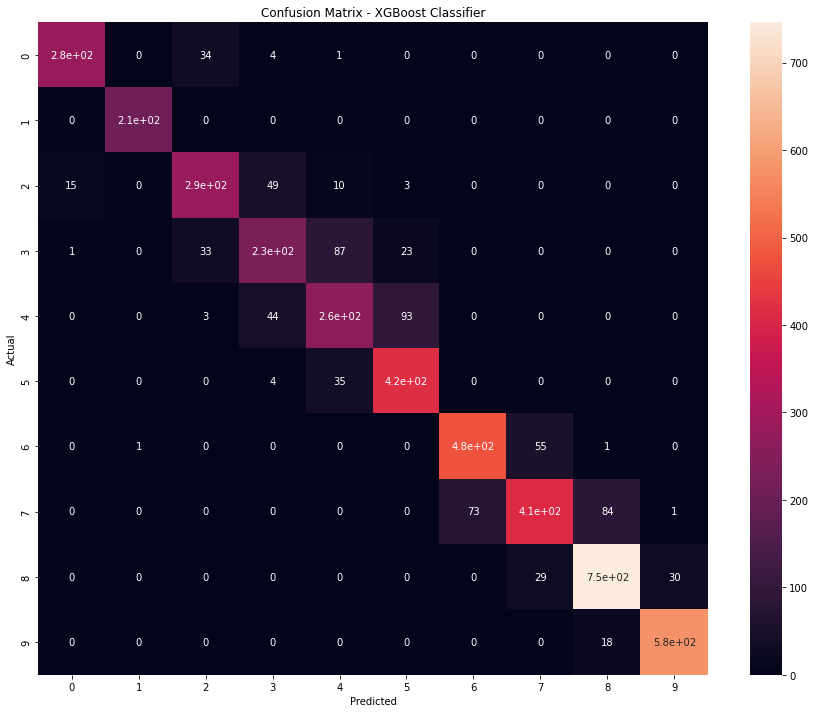

In [61]:
cm_rfc = confusion_matrix(y_test, rfc_pred)
plt.figure(figsize=(15,12))
sb.heatmap(cm_rfc, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost Classifier")

In [62]:
xgb_pred[10:20]

array(['class_2', 'class_8', 'class_8', 'class_10', 'class_8', 'class_6',
       'class_3', 'class_10', 'class_5', 'class_9'], dtype='<U8')

In [64]:
y_test.values[10:20]

array(['class_2', 'class_8', 'class_8', 'class_6', 'class_8', 'class_6',
       'class_3', 'class_10', 'class_5', 'class_9'], dtype=object)

#### Insights from the ML models:
1. XGBoost classifier outperforms all other models. The accuracy score and the prediction performance is better in this model.
2. From the visual inspection of the confusion matrix for each model the XGBoost shows better predictability. 

##### Deep Learning Model Development:

In [65]:
#importing necessary libraries

In [66]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [67]:
#Same transformed data is used for DL algorithm.
df_new = df_md.copy()
df_new.tomatometer_rating = (df_new.tomatometer_rating/10.0).astype('int')
df_new = df_new[df_new.tomatometer_rating > 0]
#df_new.tomatometer_rating = ['class_'+str(df_new.tomatometer_rating.values[i]) for i in range(df_new.shape[0])]


In [68]:
#For convinience the rating class is taken from 0-9 as DL model target variable. 
y=df_new.tomatometer_rating-1

In [69]:
X.columns

Index(['content_rating_NC17', 'content_rating_NR', 'content_rating_PG',
       'content_rating_PG-13', 'content_rating_R', 'tomatometer_status_Fresh',
       'tomatometer_status_Rotten', 'audience_status_Upright', 'runtime',
       'tomatometer_count', 'audience_rating', 'audience_count',
       'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
       'tomatometer_rotten_critics_count'],
      dtype='object')

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
#X.drop(columns=['tomatometer_top_critics_count'], inplace=True)

In [71]:
#Splitting the data into train and test data sets.
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=34)


In [72]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10822, 15), (10822,), (4639, 15), (4639,))

In [75]:
y_train.describe()

count    10822.000000
mean         4.885603
std          2.638220
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: tomatometer_rating, dtype: float64

In [76]:
#Creating the Keras Sequential Model
    
model = keras.Sequential([
    keras.layers.Dense(15, input_shape=(15,), activation='relu'),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])
   


In [77]:
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100


C:\Users\prabh\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


339/339 [==============================] - 3s 2ms/step - loss: 1.8904 - accuracy: 0.2412
Epoch 2/100
339/339 [==============================] - 1s 2ms/step - loss: 1.4979 - accuracy: 0.3221
Epoch 3/100
339/339 [==============================] - 1s 2ms/step - loss: 1.4205 - accuracy: 0.3608
Epoch 4/100
339/339 [==============================] - 1s 3ms/step - loss: 1.3757 - accuracy: 0.3818
Epoch 5/100
339/339 [==============================] - 1s 2ms/step - loss: 1.3330 - accuracy: 0.4102
Epoch 6/100
339/339 [==============================] - 1s 2ms/step - loss: 1.2814 - accuracy: 0.4409
Epoch 7/100
339/339 [==============================] - 1s 2ms/step - loss: 1.2199 - accuracy: 0.4679
Epoch 8/100
339/339 [==============================] - 1s 2ms/step - loss: 1.1583 - accuracy: 0.4989
Epoch 9/100
339/339 [==============================] - 1s 2ms/step - loss: 1.1045 - accuracy: 0.5299
Epoch 10/100
339/339 [==============================] - 1s 2ms/step - loss: 1.0532 - accuracy: 0.5551
E

In [78]:
model.evaluate(X_test, y_test)

 25/145 [====>.........................] - ETA: 0s - loss: 0.1325 - accuracy: 0.9575 

C:\Users\prabh\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


145/145 [==============================] - 1s 3ms/step - loss: 0.1557 - accuracy: 0.9556


[0.15573762357234955, 0.9555938839912415]

In [79]:
y_pred = model.predict(X_test)
y_pred[:5], y_test[:5]

(array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.5659047e-23,
         5.9262943e-04, 3.7376364e-07, 4.6789750e-01, 5.3150958e-01,
         3.7751682e-09, 2.2692008e-30],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.7098284e-31,
         6.9717242e-14, 9.9898392e-01, 1.0160854e-03, 1.3268146e-16,
         0.0000000e+00, 0.0000000e+00],
        [1.1113469e-08, 5.8270395e-01, 4.1728970e-01, 6.3014654e-06,
         3.4218549e-17, 9.4684011e-38, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [9.9983311e-01, 1.6683323e-04, 8.1522583e-21, 4.2307375e-37,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 1.5523163e-33, 1.1048833e-12, 4.5725022e-02,
         9.5427501e-01, 9.0044416e-09, 3.4513496e-14, 2.9709685e-25,
         0.0000000e+00, 0.0000000e+00]], dtype=float32),
 10785    7
 1080     5
 9604     2
 7424     0
 6577     4
 Name: tomatometer_rating, dtype:

In [80]:
y_prd = [np.argmax(y_pred[i]) for i in range(y_pred.shape[0])]


In [84]:
#Comparing the predictions: 
y_prd[:5],y_test.values[:5]

([7, 5, 1, 0, 4], array([7, 5, 2, 0, 4]))

In [85]:
print(classification_report(y_test,y_prd))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92       343
           1       0.85      0.99      0.92       397
           2       0.99      0.86      0.92       350
           3       0.93      0.99      0.96       415
           4       0.98      1.00      0.99       445
           5       0.96      0.99      0.98       548
           6       0.94      0.96      0.95       544
           7       0.95      0.96      0.95       775
           8       1.00      0.93      0.96       599
           9       1.00      1.00      1.00       223

    accuracy                           0.96      4639
   macro avg       0.96      0.95      0.96      4639
weighted avg       0.96      0.96      0.96      4639



Text(0.5, 1.0, 'Confusion Matrix - Deep Learning')

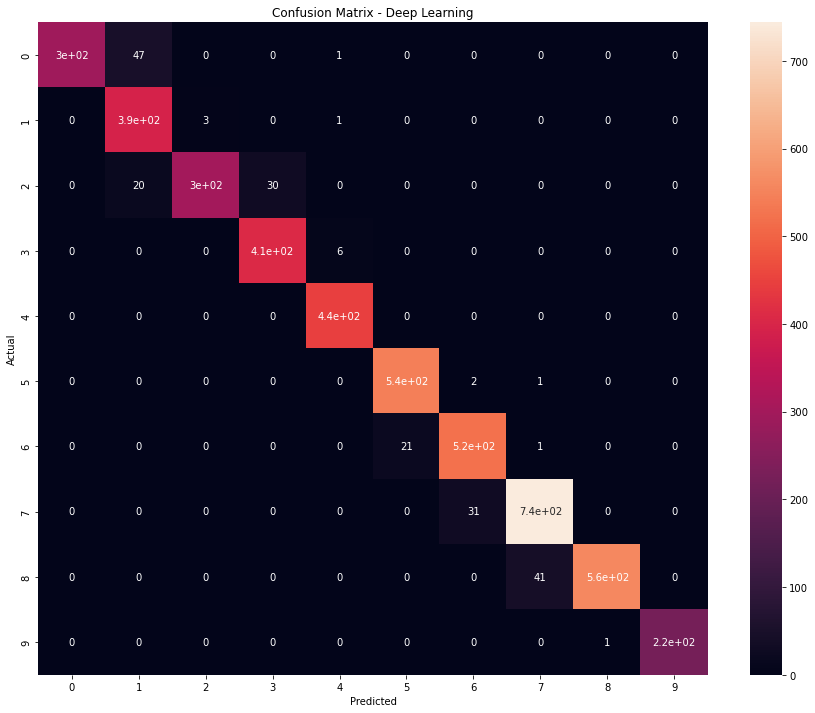

In [86]:
cm_rfc = confusion_matrix(y_test, y_prd)
plt.figure(figsize=(15,12))
sb.heatmap(cm_rfc, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Deep Learning")

### Insights from the overall model development:
##### 1. Both DL and ML Classification models performance is same. 
##### 2. In ML models the perfomance of XGBoost Classifier is better than other models.  
##### 3. The accuracy scores of DL  and XGBoost classifier model is above 90 %. 
##### 4. The False prediction is less in XGBoost and DL model as it can be seen from the confusion matrix plot. 
